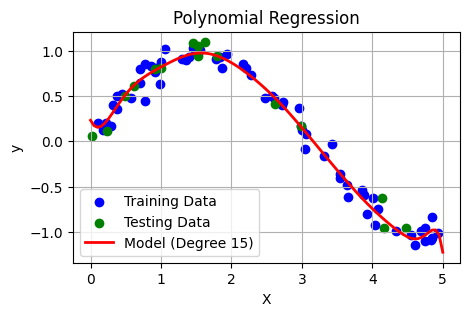

Train MSE: 0.0089
Test MSE: 0.0084


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create dummy non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # Inputs from 0 to 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sine function + noise

#  Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 3: Create and train a high-degree polynomial regression model
degree = 15  # Very high to cause overfitting
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

#  Step 4: Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  Step 5: Visualize the overfit model
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")

# Smooth curve for model prediction
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f"Model (Degree {degree})")

plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Step 6: Print errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_error:.4f}")
print(f"Test MSE: {test_error:.4f}")